In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [15]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [16]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [18]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [19]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [21]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [22]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [23]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
col = list(df.columns)
categorical_categories = []
numerical_categories = []

for i in col:
    if len(df[i].unique()) > 6:
        numerical_categories.append(i)
    else:
        categorical_categories.append(i)
        
print(categorical_categories)
print(numerical_categories)

['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label = LabelEncoder()

In [12]:
df1 = df.copy(deep = True)

In [13]:
df1['Sex'] = label.fit_transform(df1['Sex'])
df1['ChestPainType'] = label.fit_transform(df1['ChestPainType'])
df1['FastingBS'] = label.fit_transform(df1['FastingBS'])
df1['RestingECG'] = label.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = label.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = label.fit_transform(df1['ST_Slope'])
df1['HeartDisease'] = label.fit_transform(df1['HeartDisease'])

In [14]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

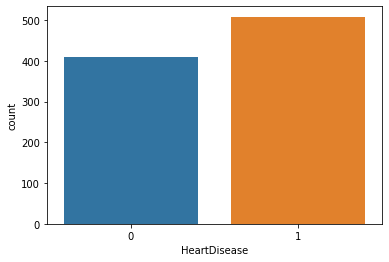

In [28]:
sns.countplot(x = 'HeartDisease', data = df1)

In [29]:
df1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

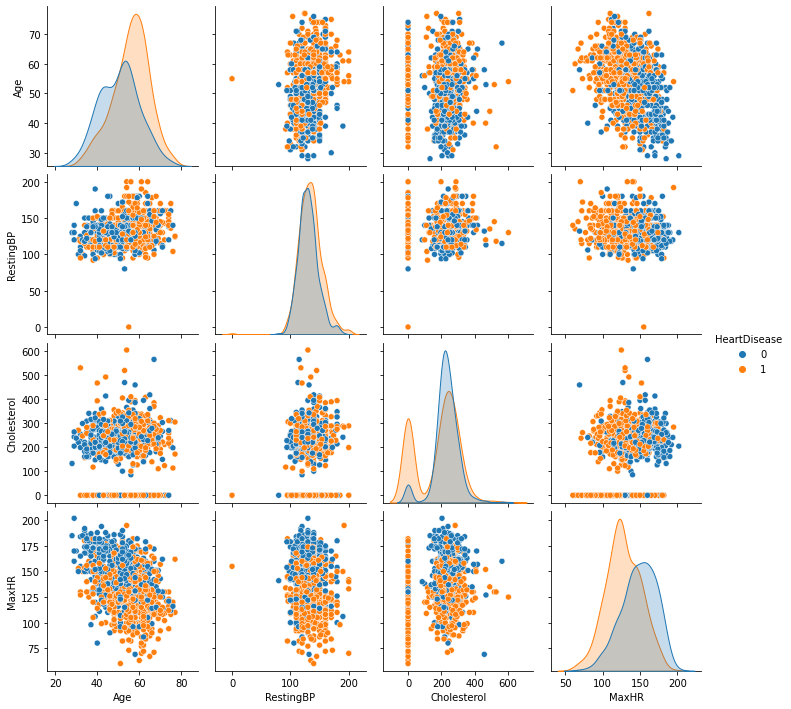

In [30]:
sns.pairplot(df1[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'HeartDisease']], hue = 'HeartDisease')

<AxesSubplot:>

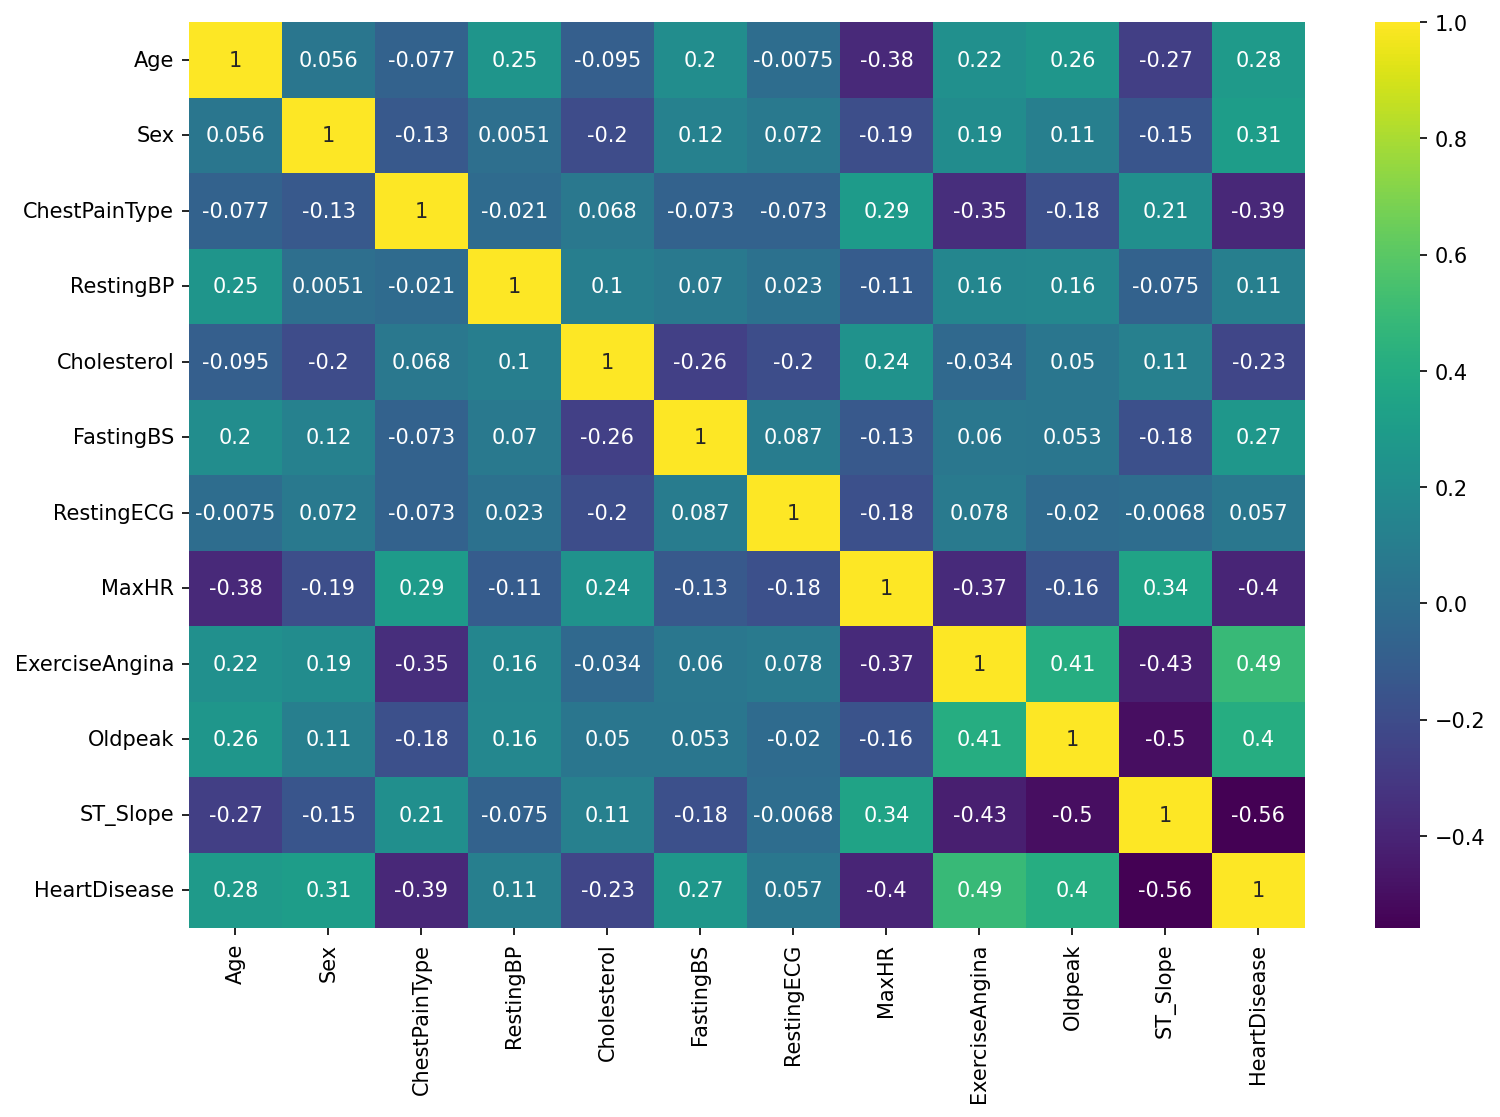

In [34]:
plt.figure(figsize=(12,8), dpi = 150)
sns.heatmap(df1.corr(), annot = True, cmap = 'viridis')

## Machine Learning

In [36]:
X = df1.drop('HeartDisease', axis = 1)

In [37]:
y = df1['HeartDisease']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [41]:
scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)

In [43]:
X_test = scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegressionCV

In [45]:
model = LogisticRegressionCV()

In [47]:
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
model.C

1.0

In [49]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [50]:
model.coef_

array([[ 0.11041451,  0.55757682, -0.58947247,  0.13672733, -0.48052172,
         0.41720941, -0.11760939, -0.24418226,  0.55912956,  0.38216379,
        -1.02642954]])

In [51]:
coefs = pd.Series(index = X.columns, data = model.coef_[0])

In [52]:
coefs

Age               0.110415
Sex               0.557577
ChestPainType    -0.589472
RestingBP         0.136727
Cholesterol      -0.480522
FastingBS         0.417209
RestingECG       -0.117609
MaxHR            -0.244182
ExerciseAngina    0.559130
Oldpeak           0.382164
ST_Slope         -1.026430
dtype: float64

<AxesSubplot:>

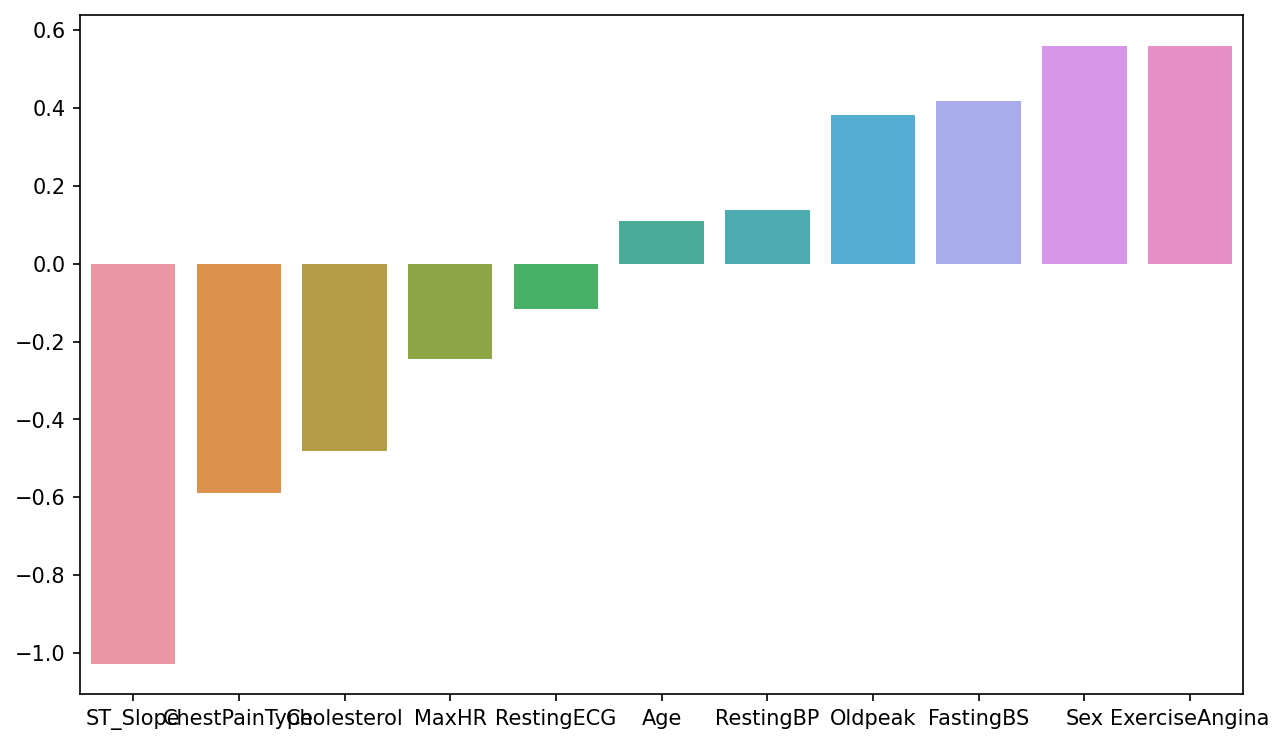

In [54]:
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi = 150)
sns.barplot(x = coefs.index, y = coefs.values)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [56]:
prediction = model.predict(X_test)

In [57]:
confusion_matrix(prediction, y_test)

array([[34,  6],
       [ 7, 45]], dtype=int64)

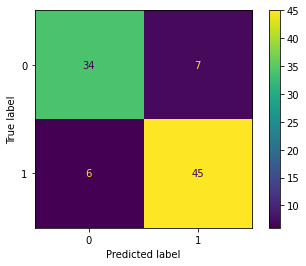

In [60]:
plot_confusion_matrix(model, X_test, y_test)

In [62]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        40
           1       0.88      0.87      0.87        52

    accuracy                           0.86        92
   macro avg       0.86      0.86      0.86        92
weighted avg       0.86      0.86      0.86        92



In [63]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

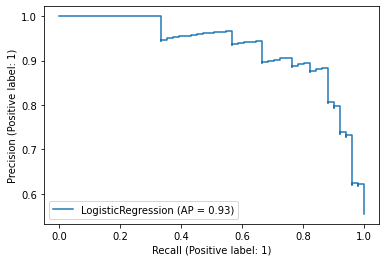

In [64]:
plot_precision_recall_curve(model, X_test, y_test)

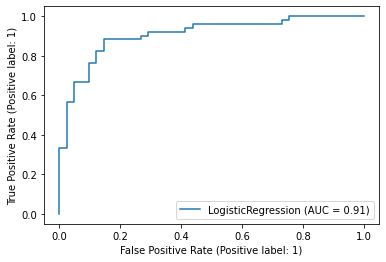

In [65]:
plot_roc_curve(model, X_test, y_test)

In [68]:
patient = [[54, 1, 0, 122, 286, 0, 0, 116, 1, 3.2, 1]]

In [69]:
model.predict(patient)

array([0], dtype=int64)

In [70]:
model.predict_log_proba(patient)

array([[   0.        , -141.33628228]])